In [133]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

#url="https://www.myfootballfacts.com/premier-league-winners/"
#page = urlopen(url)
#html = page.read().decode("utf-8")
#soup = BeautifulSoup(html, "html.parser")

from urllib.request import Request

url = Request('https://www.myfootballfacts.com/premier-league-winners/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(url)
html = webpage.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

In [134]:
# Print the actual HTML code of the page

#print (soup.prettify())

In [135]:
# Find all the images in the page (this could be useful maybe)

#soup.find_all("img")

In [136]:
# Extract the title of the page

print (soup.title)
print (soup.title.text)

<title> Premier League Winners by Year | My Football Facts</title>
 Premier League Winners by Year | My Football Facts


In [137]:
# The data that we are interested in appears to be in some sort of
# table.  Look for all of the table elements on the page, and print
# out their attributes.

for element in soup.find_all('table'):
    print (element.attrs)

{'id': 'wptmTbl1319', 'data-id': '1319', 'data-responsive': 'false', 'data-hidecols': 'false', 'data-type': 'html', 'data-paging': 'false', 'data-searching': 'true', 'data-ordering': 'false', 'data-scroll-x': 'true', 'data-scroll-collapse': 'true', 'data-align': 'center', 'data-colwidths': '[69,40,127,64,72,75,67,63,64,50,57,50]', 'class': ['disablePager', 'filterable']}
{'id': 'wptmTbl2606', 'data-id': '2606', 'data-responsive': 'false', 'data-hidecols': 'false', 'data-type': 'html', 'data-paging': 'false', 'data-searching': 'false', 'data-ordering': 'false', 'data-scroll-x': 'true', 'data-scroll-collapse': 'true', 'data-align': 'center', 'data-colwidths': '[40,130,54]', 'class': ['disablePager']}
{'border': '0', 'cellspacing': '0', 'cellpadding': '0', 'role': 'presentation'}


In [138]:
# We see that there are some elements known as 'wptmTbl####'
#
# Let's extract the first one from the page and store it in a new object
#
# Upon inspection, it looks like this is the one that we want!

my_table = soup.find("table", attrs={"id": "wptmTbl1319"})

print (my_table.prettify())


<table class="disablePager filterable" data-align="center" data-colwidths="[69,40,127,64,72,75,67,63,64,50,57,50]" data-hidecols="false" data-id="1319" data-ordering="false" data-paging="false" data-responsive="false" data-scroll-collapse="true" data-scroll-x="true" data-searching="true" data-type="html" id="wptmTbl1319">
 <colgroup>
  <col class="dtc0" data-dtc="0" data-dtr="0"/>
  <col class="dtc1" data-dtc="1" data-dtr="0"/>
  <col class="dtc2" data-dtc="2" data-dtr="0"/>
  <col class="dtc3" data-dtc="3" data-dtr="0"/>
  <col class="dtc4" data-dtc="4" data-dtr="0"/>
  <col class="dtc5" data-dtc="5" data-dtr="0"/>
  <col class="dtc6" data-dtc="6" data-dtr="0"/>
  <col class="dtc7" data-dtc="7" data-dtr="0"/>
  <col class="dtc8" data-dtc="8" data-dtr="0"/>
  <col class="dtc9" data-dtc="9" data-dtr="0"/>
  <col class="dtc10" data-dtc="10" data-dtr="0"/>
  <col class="dtc11" data-dtc="11" data-dtr="0"/>
 </colgroup>
 <thead>
  <tr class="wptm-header-cells-index dnone">
   <th class="dtr

In [139]:
# We see that the headings for the table are contained within a <tr> tag

my_heading_data = my_table.thead.find_all("tr", attrs={'class': "row0"})  # contains 1 row

print (my_heading_data)

[<tr class="row0">
<th class="dtr0 dtc0" data-priority="0">Season</th>
<th class="dtr0 dtc1" data-priority="0"></th>
<th class="dtr0 dtc2" data-priority="0">Winner</th>
<th class="dtr0 dtc3" data-priority="0">Played</th>
<th class="dtr0 dtc4" data-priority="0">Won</th>
<th class="dtr0 dtc5" data-priority="0">Drawn</th>
<th class="dtr0 dtc6" data-priority="0">Lost</th>
<th class="dtr0 dtc7" data-priority="0">Goals F</th>
<th class="dtr0 dtc8" data-priority="0">Goals A</th>
<th class="dtr0 dtc9" data-priority="0">GD</th>
<th class="dtr0 dtc10" data-priority="0">Points</th>
<th class="dtr0 dtc11" data-priority="0">PPG</th>
</tr>]


In [140]:
# Get all the headings
headings = []
for th in my_heading_data[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    # print (th)
    headings.append(th.text.replace('\n', ' ').strip())
    if headings[-1] == '':
        headings[-1] = 'Year'
    
print(headings)

['Season', 'Year', 'Winner', 'Played', 'Won', 'Drawn', 'Lost', 'Goals F', 'Goals A', 'GD', 'Points', 'PPG']


In [141]:
data = []
start_year = 1992
for i in range(1,1000):
    rowname = "row" + str(i)
    my_table_data = my_table.tbody.find_all("tr", attrs={'class': rowname})  # contains 1 row

    if not my_table_data:
        break
        
    #print (my_table_data)

    rowdata = []
    # Get the data
    for th in my_table_data[0].find_all("td"):
        # remove any newlines and extra spaces from left and right
        # print (th)
        rowdata.append(th.text.replace('\n', ' ').strip())
        if rowdata[-1] == '':
            rowdata[-1] = start_year
            start_year = start_year + 1 
    data.append(rowdata)
    #print (data)

#print (data)

df = pd.DataFrame(data, columns = headings)
df = df.apply(pd.to_numeric,errors='ignore')

df.head(100)

,Season,Year,Winner,Played,Won,Drawn,Lost,Goals F,Goals A,GD,Points,PPG
0,1992-93,1992,Manchester United,42,24,12,6,67,31,36,84,2.00
1,1993-94,1993,Manchester United,42,27,11,4,80,38,42,92,2.19
2,1994-95,1994,Blackburn Rovers,42,27,8,7,80,39,41,89,2.12
3,1995-96,1995,Manchester United,38,25,7,6,73,35,38,82,2.16
4,1996-97,1996,Manchester United,38,21,12,5,76,44,32,75,1.97
5,1997-98,1997,Arsenal,38,23,9,6,68,33,35,78,2.05
6,1998-99,1998,Manchester United,38,22,13,3,80,37,43,79,2.08
7,1999-00,1999,Manchester United,38,28,7,3,97,45,52,91,2.39
8,2000-01,2000,Manchester United,38,24,8,6,79,41,38,80,2.11
9,2001-02,2001,Arsenal,38,26,9,3,79,36,43,87,2.29


In [142]:
df.describe()

,Year,Played,Won,Drawn,Lost,Goals F,Goals A,GD,Points,PPG
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2005.500000,38.428571,26.678571,7.464286,4.285714,81.250000,32.892857,48.357143,87.500000,2.278571
std,8.225975,1.259882,2.931989,3.191216,1.652319,11.150901,7.529396,12.922029,6.362506,0.178133
min,1992.000000,38.000000,21.000000,2.000000,0.000000,67.000000,15.000000,31.000000,75.000000,1.970000
25%,1998.750000,38.000000,24.750000,5.000000,3.000000,73.000000,27.000000,39.500000,82.750000,2.127500
50%,2005.500000,38.000000,27.000000,7.500000,5.000000,79.500000,33.500000,43.500000,88.000000,2.290000
75%,2012.250000,38.000000,28.000000,9.500000,5.250000,85.250000,37.250000,56.250000,91.000000,2.375000
max,2019.000000,42.000000,32.000000,13.000000,7.000000,106.000000,45.000000,79.000000,100.000000,2.630000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   28 non-null     object 
 1   Year     28 non-null     int64  
 2   Winner   28 non-null     object 
 3   Played   28 non-null     int64  
 4   Won      28 non-null     int64  
 5   Drawn    28 non-null     int64  
 6   Lost     28 non-null     int64  
 7   Goals F  28 non-null     int64  
 8   Goals A  28 non-null     int64  
 9   GD       28 non-null     int64  
 10  Points   28 non-null     int64  
 11  PPG      28 non-null     float64
dtypes: float64(1), int64(9), object(2)
memory usage: 2.8+ KB


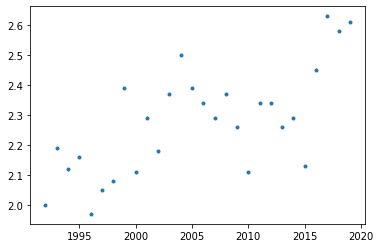

In [144]:
plt.plot(df['Year'],df['PPG'],'.')

Coefficients (from curve_fit)
[-2.73593584e+01  1.47783245e-02]
Covariance Matrix (from curve_fit)
[[ 3.87568155e+01 -1.93249498e-02]
 [-1.93249498e-02  9.63597598e-06]]


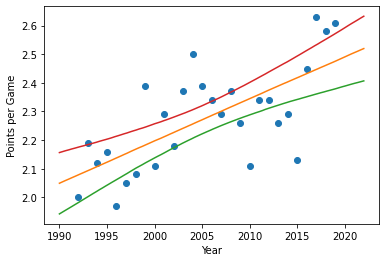

In [145]:
from scipy.optimize import curve_fit
import numpy as np

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = df['Year']
y = df['PPG']
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1990.0,2022.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(x,y,'o')
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.ylabel('Points per Game')
plt.xlabel('Year')
plt.show()

Coefficients (from curve_fit)
[2.03198574 0.01947889]
Covariance Matrix (from curve_fit)
[[ 3.15776438e-03 -2.73948509e-04]
 [-2.73948509e-04  2.97184795e-05]]


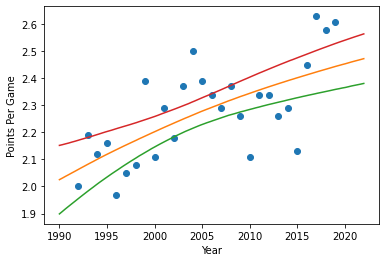

In [146]:
from scipy.optimize import curve_fit
import numpy as np

def fitfunction(x,*paramlist):
    #print (paramlist)
    #print ()
    return paramlist[0]+(1.0 - 0.968*np.exp(-1.0*paramlist[1]*(x-1992.0)))

init_vals = [0.0 for x in range(2)]
init_vals[0] = 2.1
init_vals[1] = 0.05

x = df['Year']
y = df['PPG']
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1990.0,2022.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(x,y,'o')
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.ylabel('Points Per Game')
plt.xlabel('Year')
plt.show()